# HW 05: Use Decision Tree to Solve a Mystery in History

##### Chaithra Kopparam Cheluvaiah
##### SUID 326926205
##### ckoppara@syr.edu

In [1]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns

#### DATA LOADING

In [2]:
papers = pd.read_csv('data-fedPapers85.csv')
papers.shape

(85, 72)

In [3]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 72 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   author    85 non-null     object 
 1   filename  85 non-null     object 
 2   a         85 non-null     float64
 3   all       85 non-null     float64
 4   also      85 non-null     float64
 5   an        85 non-null     float64
 6   and       85 non-null     float64
 7   any       85 non-null     float64
 8   are       85 non-null     float64
 9   as        85 non-null     float64
 10  at        85 non-null     float64
 11  be        85 non-null     float64
 12  been      85 non-null     float64
 13  but       85 non-null     float64
 14  by        85 non-null     float64
 15  can       85 non-null     float64
 16  do        85 non-null     float64
 17  down      85 non-null     float64
 18  even      85 non-null     float64
 19  every     85 non-null     float64
 20  for       85 non-null     float64


In [4]:
papers.head() # viewing first 5 rows

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


#### 1. DATA  PREPARATION

Separating original dataset to training and testing data for classification.

In [5]:
# removing disputed essays from the training and testing data
temp_df = papers[papers['author']!='dispt']
temp_df.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
11,Hamilton,Hamilton_fed_1.txt,0.213,0.083,0.000,0.083,0.343,0.056,0.111,0.093,...,0.000,0.000,0.000,0.009,0.158,0.074,0.222,0.046,0.019,0.074
12,Hamilton,Hamilton_fed_11.txt,0.369,0.070,0.006,0.076,0.411,0.023,0.053,0.117,...,0.000,0.012,0.012,0.012,0.147,0.029,0.094,0.129,0.270,0.000
13,Hamilton,Hamilton_fed_12.txt,0.305,0.047,0.007,0.068,0.386,0.047,0.102,0.108,...,0.000,0.000,0.007,0.000,0.156,0.007,0.074,0.122,0.149,0.000
14,Hamilton,Hamilton_fed_13.txt,0.391,0.045,0.015,0.030,0.270,0.045,0.060,0.090,...,0.000,0.000,0.000,0.045,0.165,0.045,0.135,0.150,0.210,0.000
15,Hamilton,Hamilton_fed_15.txt,0.327,0.096,0.000,0.086,0.356,0.014,0.086,0.072,...,0.014,0.038,0.014,0.019,0.264,0.029,0.091,0.086,0.062,0.010


In [6]:
# disputed essays
distputed_essays = papers[papers['author']=='dispt']
distputed_train = distputed_essays.iloc[:,2:]

In [7]:
temp_df.shape # 74 samples used for train and testing the model which does not contain any disputed essays

(74, 72)

In [8]:
distputed_essays.shape # 11 disupted essays that needs to be classified

(11, 72)

In [9]:
X = temp_df.iloc[:,2:] # independent variables - removing author and filename
Y = temp_df['author'] # dependent variables

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, test_size=0.4) 
# default 40% is test and 60% is training data

In [11]:
X_train.shape

(44, 70)

In [12]:
X_test.shape

(30, 70)

In [13]:
Y_train.unique()

array(['Hamilton', 'Madison', 'HM', 'Jay'], dtype=object)

In [14]:
Y_test.unique()

array(['Hamilton', 'Jay', 'Madison', 'HM'], dtype=object)

#### 2: BUILDING & POST PRUNING DECISION TREE MODEL

In [15]:
# training the model
clf = DecisionTreeClassifier(random_state=0, criterion='entropy') # entropy to measure the purity of the split 
clf.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

[Text(0.6, 0.875, 'upon <= 0.019\nentropy = 1.028\nsamples = 44\nvalue = [1, 33, 1, 9]\nclass = Madison'),
 Text(0.4, 0.625, 'and <= 0.513\nentropy = 0.866\nsamples = 11\nvalue = [1, 0, 1, 9]\nclass = Jay'),
 Text(0.2, 0.375, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9]\nclass = Jay'),
 Text(0.6, 0.375, 'would <= 0.037\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1, 0]\nclass = Hamilton'),
 Text(0.4, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0, 0]\nclass = Hamilton'),
 Text(0.8, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0]\nclass = HM'),
 Text(0.8, 0.625, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0, 0]\nclass = Madison')]

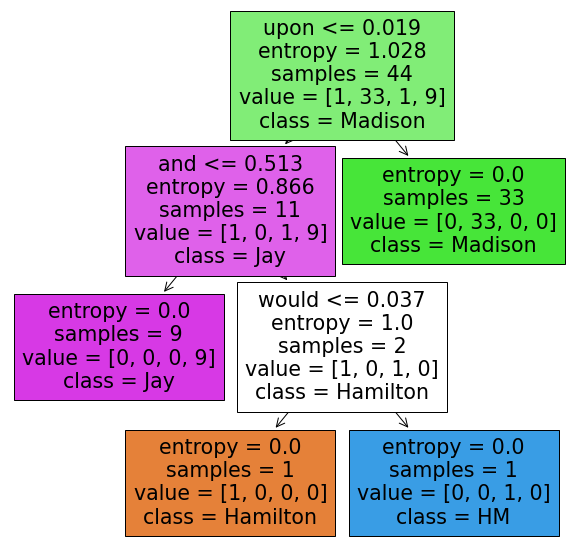

In [16]:
# visualizing the decision tree
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True,feature_names=list(X_train.columns), class_names=list(Y_train.unique()))

In [17]:
print(tree.export_text(clf,feature_names=list(X_train.columns)))

|--- upon <= 0.02
|   |--- and <= 0.51
|   |   |--- class: Madison
|   |--- and >  0.51
|   |   |--- would <= 0.04
|   |   |   |--- class: HM
|   |   |--- would >  0.04
|   |   |   |--- class: Jay
|--- upon >  0.02
|   |--- class: Hamilton



#### VALIDATING THE MODEL  - CONFUSION MATRIX

              precision    recall  f1-score   support

          HM       1.00      1.00      1.00         1
    Hamilton       1.00      1.00      1.00        33
         Jay       1.00      1.00      1.00         1
     Madison       1.00      1.00      1.00         9

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



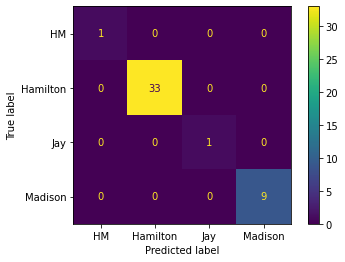

In [18]:
# validating training data

pred = clf.predict(X_train)
print(classification_report(Y_train, pred))

# plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf,X_train,Y_train)

              precision    recall  f1-score   support

          HM       0.00      0.00      0.00         2
    Hamilton       1.00      0.94      0.97        18
         Jay       0.75      0.75      0.75         4
     Madison       0.67      0.67      0.67         6

    accuracy                           0.80        30
   macro avg       0.60      0.59      0.60        30
weighted avg       0.83      0.80      0.82        30



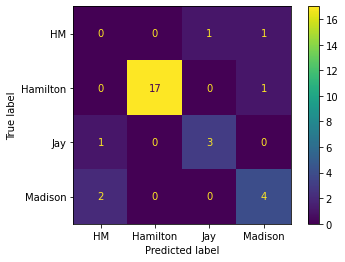

In [19]:
# validating testing data
ConfusionMatrixDisplay.from_estimator(clf,X_test,Y_test)

pred = clf.predict(X_test)
print(classification_report(Y_test, pred))

#### Model is not performing well on the testing data. Decision tree might be overfitted. Essays authored by Jay and Madison are being classified as HM. We can try to improve the decision tree classifier with pruning techniques

#### Post pruning decision trees with cost complexity pruning


Pruning technique is parameterized by the cost complexity parameter, `ccp_alpha`. Greater values of `ccp_alpha` increase the number of nodes pruned. It is necessary to appropriate `ccp_alpha` and use it while training the model.

In [21]:
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.        , 0.04545455, 0.17100961, 0.81127812])

In [22]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0,criterion='entropy', ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.8112781244591327


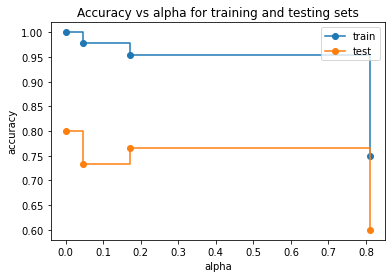

In [23]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [40]:
from sklearn.metrics import accuracy_score

ccp_alpha = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for val in ccp_alpha:
    clf = DecisionTreeClassifier(random_state=0,criterion='entropy',ccp_alpha=val)
    clf.fit(X_train, Y_train)
    accuracy_training = accuracy_score(Y_train, clf.predict(X_train))
    accuracy_testing = accuracy_score(Y_test, clf.predict(X_test))
    print(f'Training Accuracy(ccp_alpha={val}):{accuracy_training},   Testing Accuracy(max_depth={val}):{accuracy_testing}')

Training Accuracy(ccp_alpha=0.0):1.0,   Testing Accuracy(max_depth=0.0):0.8
Training Accuracy(ccp_alpha=0.1):0.9772727272727273,   Testing Accuracy(max_depth=0.1):0.7333333333333333
Training Accuracy(ccp_alpha=0.2):0.9545454545454546,   Testing Accuracy(max_depth=0.2):0.7666666666666667
Training Accuracy(ccp_alpha=0.3):0.9545454545454546,   Testing Accuracy(max_depth=0.3):0.7666666666666667
Training Accuracy(ccp_alpha=0.4):0.9545454545454546,   Testing Accuracy(max_depth=0.4):0.7666666666666667
Training Accuracy(ccp_alpha=0.5):0.9545454545454546,   Testing Accuracy(max_depth=0.5):0.7666666666666667
Training Accuracy(ccp_alpha=0.6):0.9545454545454546,   Testing Accuracy(max_depth=0.6):0.7666666666666667
Training Accuracy(ccp_alpha=0.7):0.9545454545454546,   Testing Accuracy(max_depth=0.7):0.7666666666666667
Training Accuracy(ccp_alpha=0.8):0.9545454545454546,   Testing Accuracy(max_depth=0.8):0.7666666666666667
Training Accuracy(ccp_alpha=0.9):0.75,   Testing Accuracy(max_depth=0.9):0.6

decided to train the model with ccp_alpha = 0.4

#### Hyperparameter Tuning
Here we are going to do tuning based on ‘max_depth’. We will try with max depth starting from 1 to 10 and depending on the final ‘accuracy’ score choose the value of max_depth.

In [39]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    clf = DecisionTreeClassifier(random_state=0,criterion='entropy',ccp_alpha=0.4,max_depth=val)
    clf.fit(X_train, Y_train)
    accuracy_training = accuracy_score(Y_train, clf.predict(X_train))
    accuracy_testing = accuracy_score(Y_test, clf.predict(X_test))
    print(f'Training Accuracy(max_depth={val}):{accuracy_training},   Testing Accuracy(max_depth={val}):{accuracy_testing}')

Training Accuracy(max_depth=1):0.9545454545454546,   Testing Accuracy(max_depth=1):0.7666666666666667
Training Accuracy(max_depth=2):0.9545454545454546,   Testing Accuracy(max_depth=2):0.7666666666666667
Training Accuracy(max_depth=3):0.9545454545454546,   Testing Accuracy(max_depth=3):0.7666666666666667
Training Accuracy(max_depth=4):0.9545454545454546,   Testing Accuracy(max_depth=4):0.7666666666666667
Training Accuracy(max_depth=5):0.9545454545454546,   Testing Accuracy(max_depth=5):0.7666666666666667
Training Accuracy(max_depth=6):0.9545454545454546,   Testing Accuracy(max_depth=6):0.7666666666666667
Training Accuracy(max_depth=7):0.9545454545454546,   Testing Accuracy(max_depth=7):0.7666666666666667
Training Accuracy(max_depth=8):0.9545454545454546,   Testing Accuracy(max_depth=8):0.7666666666666667
Training Accuracy(max_depth=9):0.9545454545454546,   Testing Accuracy(max_depth=9):0.7666666666666667
Training Accuracy(max_depth=10):0.9545454545454546,   Testing Accuracy(max_depth=1

#### From the above scores, we can consider any value of ccp_alpha between 0.2 - 0.8 with any max_depth between 1-10.

In [33]:
clf = DecisionTreeClassifier(random_state=0,criterion='entropy',ccp_alpha=0.1,max_depth=10)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.1, criterion='entropy', max_depth=10,
                       random_state=0)

[Text(0.6, 0.8333333333333334, 'upon <= 0.019\nentropy = 1.028\nsamples = 44\nvalue = [1, 33, 1, 9]\nclass = Madison'),
 Text(0.4, 0.5, 'and <= 0.513\nentropy = 0.866\nsamples = 11\nvalue = [1, 0, 1, 9]\nclass = Jay'),
 Text(0.2, 0.16666666666666666, 'entropy = 0.0\nsamples = 9\nvalue = [0, 0, 0, 9]\nclass = Jay'),
 Text(0.6, 0.16666666666666666, 'entropy = 1.0\nsamples = 2\nvalue = [1, 0, 1, 0]\nclass = Hamilton'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 33\nvalue = [0, 33, 0, 0]\nclass = Madison')]

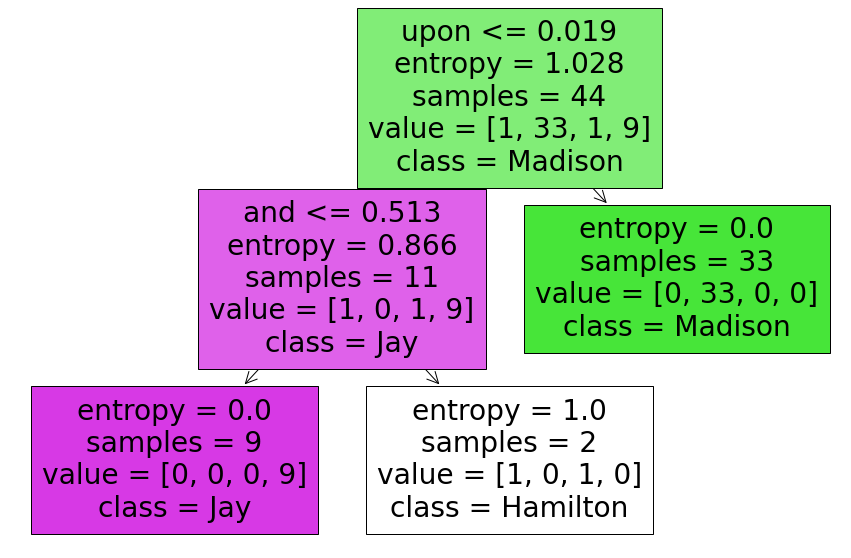

In [34]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True, feature_names=list(X_train.columns), class_names=list(Y_train.unique()))

In [35]:
print(tree.export_text(clf,feature_names=list(X_train.columns)))

|--- upon <= 0.02
|   |--- and <= 0.51
|   |   |--- class: Madison
|   |--- and >  0.51
|   |   |--- class: HM
|--- upon >  0.02
|   |--- class: Hamilton



              precision    recall  f1-score   support

          HM       0.50      1.00      0.67         1
    Hamilton       1.00      1.00      1.00        33
         Jay       0.00      0.00      0.00         1
     Madison       1.00      1.00      1.00         9

    accuracy                           0.98        44
   macro avg       0.62      0.75      0.67        44
weighted avg       0.97      0.98      0.97        44



C:\Users\Chaithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chaithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chaithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


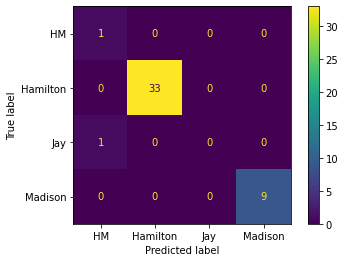

In [36]:
# validating training data

pred = clf.predict(X_train)
print(classification_report(Y_train, pred))

# plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(clf,X_train,Y_train)


              precision    recall  f1-score   support

          HM       0.14      0.50      0.22         2
    Hamilton       1.00      0.94      0.97        18
         Jay       0.00      0.00      0.00         4
     Madison       0.67      0.67      0.67         6

    accuracy                           0.73        30
   macro avg       0.45      0.53      0.47        30
weighted avg       0.74      0.73      0.73        30



C:\Users\Chaithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chaithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chaithra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


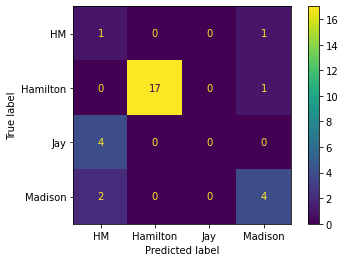

In [37]:
# validating testing data
ConfusionMatrixDisplay.from_estimator(clf,X_test,Y_test)

pred = clf.predict(X_test)
print(classification_report(Y_test, pred))

#### 3 PREDICTION

In [38]:
dispt_pred=clf.predict(distputed_train)
dispt_pred

array(['Madison', 'Madison', 'Madison', 'Madison', 'Madison', 'Madison',
       'Madison', 'Madison', 'Madison', 'Madison', 'Madison'],
      dtype=object)

#### Conclusion: Disputed essays are authored by Madison